# Essential Tools: Git and Jupyter 

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%run -i common.py
%run -i ln_preamble.py
from importlib import reload
from datetime import datetime

/Users/markcrovella/repos/DS701-Tools-for-Data-Science/common.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Markdown, TextDisplayObject, Javascript


<Figure size 432x288 with 0 Axes>

## Critical Course Tools

This course focuses on developing practical skills in working with data and providing students with a hands-on understanding of classical data analysis techniques. 

This will be a coding-intensive course. 

Instruction in this course will use [Python](https://www.python.org/), since it allows for fast prototyping and is supported by a great variety of scientific (and, specifically, data related) libraries.

The materials of this course can be found under [this GitHub account](https://github.com/mcrovella/DS701-Tools-for-Data-Science). 

Both the lectures and the homeworks of this course are in the format of [Jupyter notebooks](https://jupyter.org).

__Today's Agenda__ is a quick review of essential tools you will need for this course.

We are __not__ providing a comprehensive introduction to these tools.

They are all __extensively__ documented online and you will need to familiarize with online resources to learn what you need.  

Stack overflow, etc, is also your friend -- but as a reference, not as a way to solve homework problems!

__The key tools you will need__ are:
1. Git
2. Jupyter
3. Pandas

## Python

We will not be teaching you python in this course.  

You are assumed to be proficient in python.

If you need to refresh your memory, there is a quick review of Python in the online lecture notes.

There are many ways to install Python.  

The biggest challenge in installing Python is configuring the many different packages that can be used.

For that reason, I recommend the free **Anaconda Scientific Python** distribution, which you can find via Google. This Python distribution contains most of the packages that we will be using throughout the course. It also includes an easy-to-use but powerful package install/update system, **`conda`**.

Note that we are using Python 3 (get the latest version, which should be 3.9 or later).  

## Git

One of the goals of this course is make you familiar with the modern workflow of code-versioning and collaboration. 



If you don't have it already, download **git** from [here](http://git-scm.com/downloads). 

If you don't already have one, you __must__ also create an account on GitHub.

You can find extensive documentation on how to use **git** on the [Help Pages of Github](https://docs.github.com/en/get-started/quickstart), on [Atlassian](https://www.atlassian.com/git/tutorials/setting-up-a-repository), and many other sites.

## Working with Git

### Configuration

The first time we use *git* on a new machine, we need to configure our name and email

```
$ git config --global user.name "Mark Crovella"
$ git config --global user.mail "crovella@bu.edu"
```
Use the email that you used for your GitHub account.

### Creating a Repository

In [5]:
def showGitTerm(title="Command Line"):
    return showTerm(EDITORTERM, title, "100%", 1000)
showGitTerm()

After installing Git, we can configure our first repository. First, let's create a new directory.

```
$ mkdir thoughts
$ cd thoughts
```

Now, we can create a *git* repository in this directory.

```
$ git init
```

We can check that everything is set up correctly by asking *git* to tell us the status of our project.

```
$ git status
On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)
```

In [6]:
showGitTerm()

Now, create a file named ```science.txt```, edit it with your favorite text editor and add the following lines

```
Starting to think about data
```

If we check the status of our repository again, *git* tells us that there is a new file:
```
$ git status
On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

        science.txt

nothing added to commit but untracked files present (use "git add" to track)
```

To give you precise control about what changes are included in each revision, *git* has a special staging area.

In the staging area it keeps track of things that you have added to the current change set but not yet committed. 

```git add``` puts things in this area, and ```git commit``` then copies them to long-term storage (as a commit):

![Alt text](./figs/git-staging-area.png)

In [7]:
showGitTerm()

The "untracked files" message means that there's a file in the directory that *git* isn't keeping track of. We can tell *git* that it should do so using ```git add```:

```
$ git add science.txt
```

and then check that the file is now being tracked:

```
$ git status
On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

        new file:   science.txt

```

*git* now knows that it's supposed to keep track of ```science.txt```, but it hasn't yet recorded any changes for posterity as a commit. 

To get it to do that, we need to run one more command:

```
$ git commit -m "Preparing for science"
[master (root-commit) f516d22] Preparing for science
 1 file changed, 1 insertion(+)
 create mode 100644 science.txt
```

In [8]:
showGitTerm()

When we run ```git commit```, *git* takes everything we have told it to save by using ```git add``` and stores a copy permanently inside the special ```.git``` directory. 

This permanent copy is called a **revision** and its short identifier is *f516d22*. (Your revision will have another identifier.)

We use the -m flag (for "message") to record a comment that will help us remember later on what we did and why. 

If we just run ```git commit``` without the ```-m``` option, *git* will launch an editor such as ```vim``` (or whatever other editor we configured at the start) so that we can write a longer message. 

If we run git status now:
```
$ git status
On branch master
nothing to commit, working tree clean
```

it tells us everything is up to date. If we want to know what we've done recently, we can ask *git* to show us the project's history using ```git log```:

```
$ git log
Author: Mark Crovella <crovella@bu.edu>
Date:   Sun Jan 25 12:48:44 2015 -0500

    Preparing for science
```

### Changing a file

In [9]:
showGitTerm()

Now, suppose that we edit the file:

```
Starting to think about data
I need to attend CS506
```

Now if we run ```git status```, *git* will tell us that a file that it is tracking has been modified:

```
$ git status
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

        modified:   science.txt

no changes added to commit (use "git add" and/or "git commit -a")
```

The last line is the key phrase: *"no changes added to commit"*. 

We have changed this file, but we haven't told *git* we will want to save those changes (which we do with ```git add```) much less actually saved them. 

Let's double-check our work using ```git diff```, which shows us the differences between the current state of the file and the most recently saved version:

```
$ git diff
diff --git a/science.txt b/science.txt
index 0ac4b7b..c5b1b05 100644
--- a/science.txt
+++ b/science.txt
@@ -1 +1,2 @@
 Starting to think about data
+I need to attend CS506
```

In [10]:
showGitTerm()

OK, we are happy with that, so let's commit our change:
```
$ git commit -m "Related course"
On branch master
Changes not staged for commit:
        modified:   science.txt

no changes added to commit
```

*Whoops!* *Git* won't commit the file because we didn't use ```git add``` first. Let's fix that:
```
$ git add science.txt
$ git commit -m "Related course"
[master 1bd7277] Related course
 1 file changed, 1 insertion(+)
```

*Git* insists that we add files to the set we want to commit before actually committing anything because we may not want to commit everything at once. 

For example, suppose we're adding a few citations to our project. We might want to commit those additions, and the corresponding addition to the bibliography, but not commit the work we're doing on the analysis (which we haven't finished yet).

### Recovering old versions

In [11]:
showGitTerm()

We can save changes to files and see what we have changed. How can we restore older versions however? Let's suppose we accidentally overwrite the file:

```
$ cat science.txt
Despair! Nothing works
```

Now, ```git status``` tells us that the file has been changed, but those changes haven't been staged:

```
$ git status
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

        modified:   science.txt

no changes added to commit (use "git add" and/or "git commit -a")
```

We can put things back the way they were by using ```git checkout```:

```
$ git checkout HEAD science.txt
$ cat science.txt
Starting to think about data
I need to attend CS506
```

## GitHub

Systems like *git* allow us to move work between any two repositories.

In practice, though, it's easiest to use one copy as a central hub, and to keep it on the web rather than on someone's laptop. Most programmers use hosting services like [GitHub](https://github.com/) to hold those master copies. 

For the purpose of our course, we will be using [GitHub](https://github.com/) to host the course material. 

You will also submit your homeworks through this platform. 

Next, we will cover how you can clone the course's repository and how to submit your solutions to the homework. 

For more information on how to create your own repository on GitHub and upload code to it, please see the tutorial by [Software Carpentry](http://swcarpentry.github.io/git-novice/).

<img src="./figs/github-workflow.jpg" alt="Drawing" width="500px">

This workflow shows you the essential new commands:

* ``git pull``
* ``git push``

And when you first copy a remote repository, you will use:

* ``git clone``

### Course repositories

The material of the course is hosted on GitHub, under [this account](https://github.com/mcrovella/CS506-Computational-Tools-for-Data-Science).

In order to download a copy of the lectures and run them locally on your computer, you need to clone the lecture repository. To do that:

1. Create a new folder for the course.
```
$ mkdir cs506
$ cd cs506
```
2. Copy the clone url from the [repository's website](https://github.com/mcrovella/CS506-Computational-Tools-for-Data-Science).
3. Clone the repository from *git*.
```
$ git clone https://github.com/mcrovella/CS506-Computational-Tools-for-Data-Science.git
```

You should now have a directory with the course material.

To update the repository and download the **new material**, type
```
$ git pull
```

### Create a private homework repository

Each assignment will have its own private repository, on GitHub shared only by you and the instructors.  

The last commit time on the repo will be used as the submission time.

## Jupyter Notebook

You should get used to developing your code _incrementally._

If you typically are writing files that you then run from the command line, e.g., `python code.py`, then you are not getting one of the main benefits of working in python.

Instead you should __interact with the interpreter.__  

An ideal way to do this is to use `Jupyter notebook`.   This puts a browser front-end on `ipython`.  

In fact, these slides are actually just a Jupyter notebook.

To run the Jupyter Notebook server from the command line, type ```jupyter notebook```. Your web browser will open and load the environment.

In the notebook, you can type and run code:

In [12]:
print("whatever!")

whatever!


### Ideal Use of Jupyter Notebook

The Jupyter Notebook environment is beneficially used as follows:
* Documentation Cell(s)
* Computation Cell(s)
* Visualization Cell(s)

For example, let's say you are studying correlation in stock prices.

First, you document what you are doing:

We are interested in asking "how similar" are two stock prices.

The tool for this purpose is __correlation__, ie, normalized covariance:

$$\rho(X,Y) = \frac{E\left[(X-\mu_X)(Y-\mu_Y)\right]}{\sigma_X \sigma_Y}$$

Then, you perform the computation:

In [14]:
import pandas as pd
import yfinance as yf

stocks = ['TSLA', 'YELP']
df = pd.DataFrame()
for s in stocks:
    df[s] = pd.DataFrame(yf.download(s,start='2014-01-01',end='2014-12-31', progress = False))['Close']

rets = df.pct_change(30)

df.corr()

,TSLA,YELP
TSLA,1.000000,0.137742
YELP,0.137742,1.000000


Then, you visualize the results:

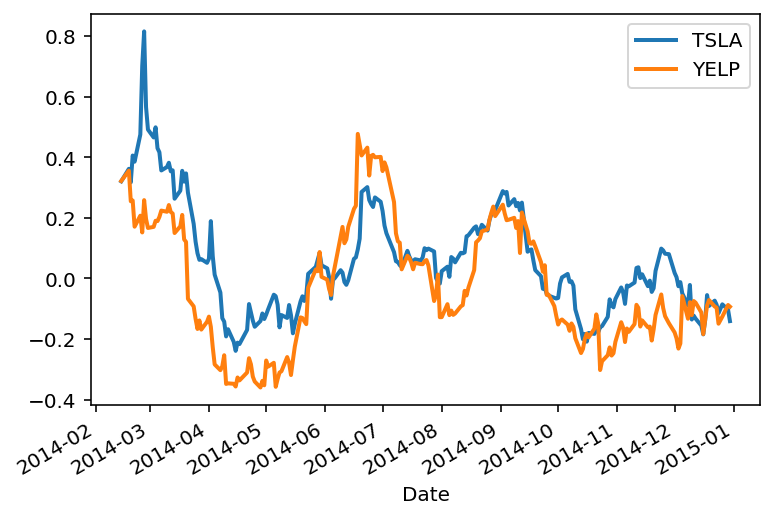

In [15]:
rets[['TSLA', 'YELP']].plot(lw=2)
plt.legend(loc='best');

As you use the Jupyter notebook, this will become a natural cycle:
    
* Document
* Compute
* Visualize